# Pandas를 이용해서 외부 데이터를 가져올 수 있다.

웹 사이트 데이터를 `read_html()`를 이용해서 크롤링 할 수 있고  `pandas-datareader`를 이용해서 데이터를 가져올 수 있다.

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

## FnGuide Table 가져오기

- `read_html()`를 이용해서 FnGuide 사이트에 나와있는 table 데이터를 가져올 수 있다.
- Url은 [FnGuide](https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701) 이것을 이용했다.

In [3]:
ticker = '005930'

In [4]:
url = f'https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A{ticker}&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701'
fnguide_data = pd.read_html(url, header=0)

In [5]:
# 재무비율
fnguide_data[0].head()

,IFRS(연결),2017/12,2018/12,2019/12,2020/12,2021/03
0,안정성비율,안정성비율,안정성비율,안정성비율,안정성비율,안정성비율
1,유동비율계산에 참여한 계정 펼치기,218.8,252.9,284.4,262.2,232.1
2,당좌비율계산에 참여한 계정 펼치기,181.6,210.9,242.4,219.8,198.1
3,부채비율계산에 참여한 계정 펼치기,40.7,37.0,34.1,37.1,43.2
4,유보율계산에 참여한 계정 펼치기,23681.4,26648.2,28302.4,29723.5,29511.5


In [6]:
info_url = f'https://comp.fnguide.com/SVO2/ASP/SVD_Corp.asp?pGB=1&gicode=A{ticker}&cID=&MenuYn=Y&ReportGB=&NewMenuID=102&stkGb=701'
fnguide_info_data = pd.read_html(info_url, header=0)

In [7]:
# 기업 정보
fnguide_info_data[0]

,주소,경기도 수원시 영통구 삼성로 129 (매탄동),경기도 수원시 영통구 삼성로 129 (매탄동).1,경기도 수원시 영통구 삼성로 129 (매탄동).2
0,홈페이지,http://www.samsung.com/sec,회사영문명,SamsungElec
1,대표번호,031)200-1114,IR 담당자,02)2255-9000
2,대표자,"김기남, 김현석, 고동진",계열명,삼성
3,설립일,1969/01/13,상장일,1975/06/11
4,벤처기업지정일,-,벤처기업해제(예정)일,-
5,명의개서,한국예탁결제원,공고신문,중앙일보
6,주거래은행,우리은행,감사인,안진회계법인
7,종업원수,109490,감사의견,적정의견
8,재평가일,1999/04/01,구기업명,-


## pandas-datareader로 시장 데이터 가져오기

`pandas` 데이터 제공 API를 바로 연결할 수 있다, 그러나 이 기능은 `pandas-datareader`로 사용가능하다. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

도큐먼트를 보고 [documentation](https://pandas-datareader.readthedocs.io/en/latest/) API 제공 사이트 업데이트와 기존 API 변경점 등을 확인할 수 있다.

### Yahoo Finance 이용
- https://finance.yahoo.com 사이트를 이용해서 종목코드를 찾거나 검색가능
- 한국 코스피 주식은 .ks를 붙여야 된다. 이러한 종목코드 특징들을 사이트로 확인하자

In [8]:
start = '2014'
end = datetime(2017, 5, 24)
# 삼성전자를 이용
yahoo= web.DataReader('005930.ks', 'yahoo', start=start, end=end)
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 2014-01-02 to 2017-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       836 non-null    float64
 1   Low        836 non-null    float64
 2   Open       836 non-null    float64
 3   Close      836 non-null    float64
 4   Volume     836 non-null    float64
 5   Adj Close  836 non-null    float64
dtypes: float64(6)
memory usage: 45.7 KB


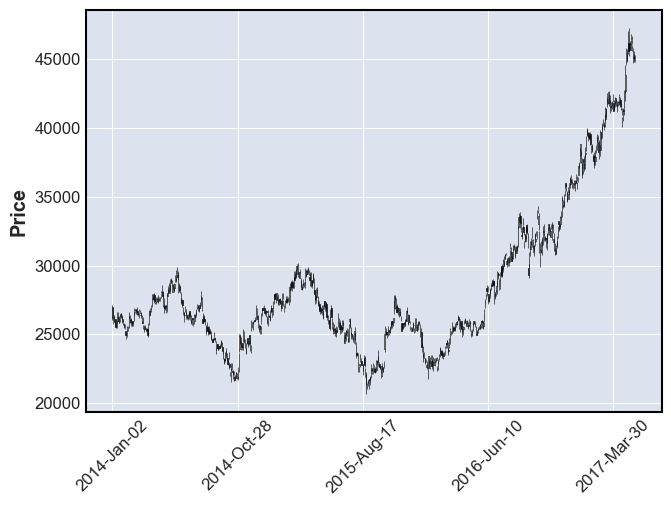

<Figure size 640x480 with 0 Axes>

In [9]:
mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')
plt.tight_layout()

### Naver Finance

다행히도 Pandas Datareader에서 Naver Finance API로 데이터를 제공하는 기능이 추가 되었다.

In [11]:
start = '2014'
end = datetime(2017, 5, 24)
# 삼성전자를 이용
naver_finance = web.DataReader('005930', 'naver', start=start, end=end)
naver_finance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 835 entries, 2014-01-02 to 2017-05-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    835 non-null    object
 1   High    835 non-null    object
 2   Low     835 non-null    object
 3   Close   835 non-null    object
 4   Volume  835 non-null    object
dtypes: object(5)
memory usage: 39.1+ KB


위의 DataFrame info를 보면 데이터 타입이 Object인것을 알 수 있다. 이는 숫자 자료형이 아니고 문자로 인식하고 있다는 것을 알 수 있다.

밑의 코드로 데이터 타입을 Int로 변경해준다.

In [14]:
naver_finance = naver_finance.astype('int64')

<AxesSubplot:xlabel='Date'>

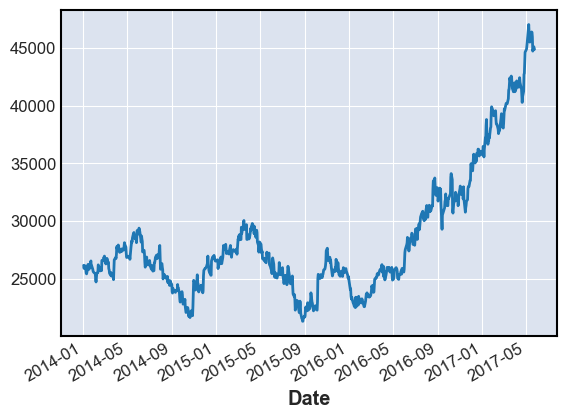

In [15]:
naver_finance['Close'].plot()